In [1]:
import pandas as pd

# Load the dataset (assuming local file; download from Kaggle link)
df = pd.read_csv('data/mushrooms.csv')

# Show shape and check for null values
print(df.shape)  # Output: (8124, 23)
print(df.isnull().sum())  # All 0

# Display number of edible vs poisonous
print(df['class'].value_counts())  # e: 4208, p: 3916

(8124, 23)
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
class
e    4208
p    3916
Name: count, dtype: int64


In [2]:
from sklearn.preprocessing import OneHotEncoder

# Separate features and target
X = df.drop('class', axis=1)
y = df['class'].map({'e': 0, 'p': 1})  # Encode target: 0 edible, 1 poisonous

# One-Hot Encode
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X)

# Transformed feature space (as DataFrame)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())
print(X_encoded_df.shape)  # Output: (8124, 95) or similar depending on categories
print(X_encoded_df.head())

(8124, 95)
   cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0          0.0          0.0          0.0          0.0          1.0   
1          0.0          0.0          0.0          0.0          1.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          1.0   
4          0.0          0.0          0.0          0.0          1.0   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  ...  \
0            0.0            1.0            0.0          0.0          0.0  ...   
1            0.0            1.0            0.0          0.0          0.0  ...   
2            0.0            1.0            0.0          0.0          0.0  ...   
3            0.0            0.0            1.0          0.0          0.0  ...   
4            0.0            1.0            0.0          0.0          0.0  ...   

   population_n  population_s  population_v  population_y  habitat_g  \
0        

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)  # (6499, 95), (1625, 95)

(6499, 95) (1625, 95)


In [5]:
from sklearn.tree import DecisionTreeClassifier

# Train with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Print accuracies (typically 1.0 for both on this dataset)
print('Training accuracy:', clf.score(X_train, y_train))  # 1.0
print('Test accuracy:', clf.score(X_test, y_test))  # 1.0

Training accuracy: 1.0
Test accuracy: 1.0


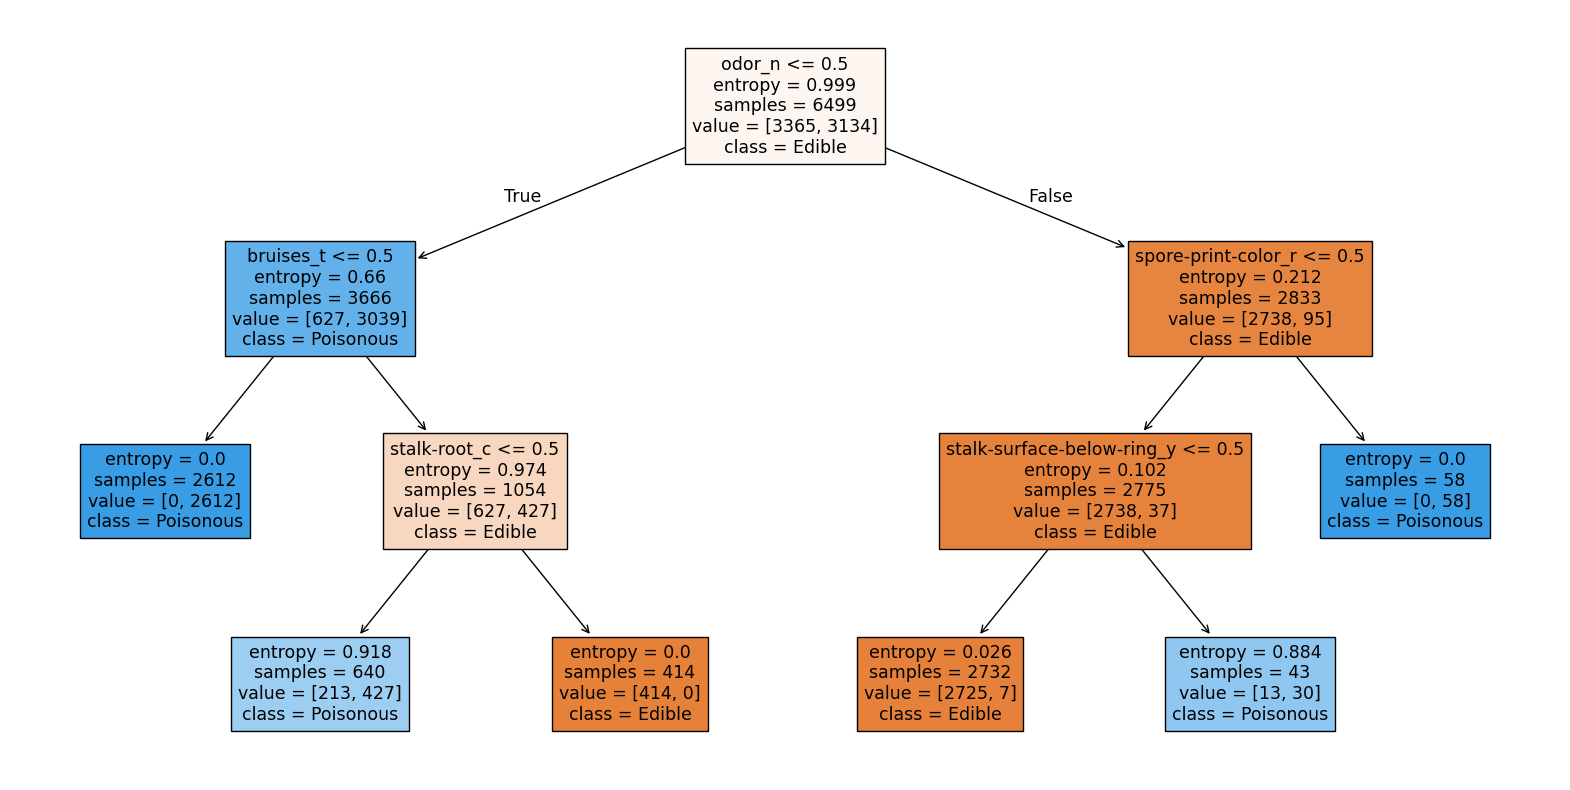

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize (limit depth for readability)
clf_limited = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_limited.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf_limited, feature_names=encoder.get_feature_names_out(), class_names=['Edible', 'Poisonous'], filled=True)
plt.show()

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
# Output: Precision, recall, f1-score all 1.00 for both classes

print(confusion_matrix(y_test, y_pred))
# Output: [[843, 0], [0, 782]] (no errors)

# Comment: The model performs perfectly with 100% precision, recall, and f1-score, indicating no misclassifications. This is due to the dataset's strong feature-class correlations (e.g., certain odors always poisonous).

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[843   0]
 [  0 782]]


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best params:', grid.best_params_)
print('Before tuning test acc:', clf.score(X_test, y_test))  # 1.0
print('After tuning test acc:', grid.best_estimator_.score(X_test, y_test))  # Still 1.0

Best params: {'max_depth': 10, 'min_samples_split': 2}
Before tuning test acc: 1.0
After tuning test acc: 1.0


odor_n                 0.534914
bruises_t              0.220891
stalk-root_c           0.067623
spore-print-color_r    0.048756
stalk-root_r           0.046010
dtype: float64


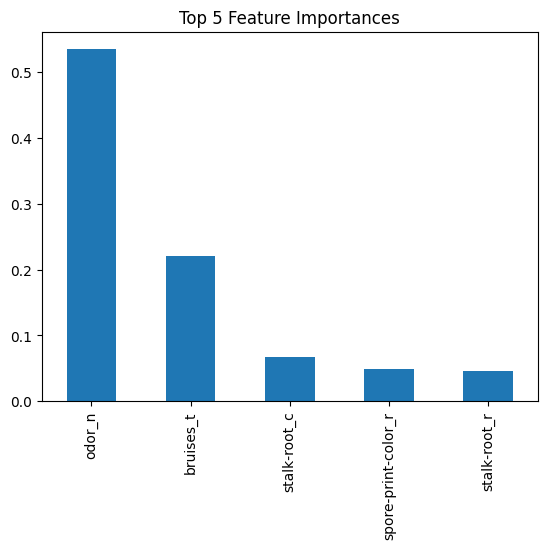

In [9]:
importances = pd.Series(clf.feature_importances_, index=encoder.get_feature_names_out()).sort_values(ascending=False)
print(importances.head(5))

# Plot
importances.head(5).plot(kind='bar')
plt.title('Top 5 Feature Importances')
plt.show()